Вам можуть знадобитись такі символи:


Символ | Код
--- | ---
$\wedge$ | \\$\wedge\\$
$\vee$ | \\$\vee\\$
$\neg$ | \\$\neg\\$
$\rightarrow$ | \\$\rightarrow\\$
$\oplus$ | \\$\oplus\\$
$\equiv$ | \\$\equiv\\$
$\Leftrightarrow$ | \\$\Leftrightarrow\\$

## Завдання 1
Запишіть наступні висловлювання у математичній формі та складіть для них таблиці істиності:

a) “Морті прийде на вечірку тоді й тільки тоді, коли Джесіка прийде на вечірку(B), а Рік не прийде(C)”.

A - \
B - \
C -

$X = $

$$
\begin{array} {|r|r|}\hline
A & B & C & X \\ \hline
1 & 1 & 1 & ? \\ \hline
0 & 1 & 1 & ? \\ \hline
1 & 0 & 1 & ? \\ \hline
0 & 0 & 1 & ? \\ \hline
1 & 1 & 0 & ? \\ \hline
0 & 1 & 0 & ? \\ \hline
1 & 0 & 0 & ? \\ \hline
0 & 0 & 0 & ? \\ \hline
\end{array}
$$

b) “Якщо ми успішно виконаємо домашнє завдання з математичної логіки (A), то ми отримаємо заліковий бал (B) або візьмемо участь у науковому семінарі (C), водночас якщо ми візьмемо участь у науковому семінарі і отримаємо заліковий бал, то достроково складемо іспит з математичної логіки (D)”.

A - \
B - \
C - \
D -

$X = $

$$
\begin{array} {|r|r|}\hline
A & B & C & D & X \\ \hline
1 & 1 & 1 & 1 & ? \\ \hline
0 & 1 & 1 & 1 & ? \\ \hline
1 & 0 & 1 & 1 & ? \\ \hline
0 & 0 & 1 & 1 & ? \\ \hline
1 & 1 & 0 & 1 & ? \\ \hline
0 & 1 & 0 & 1 & ? \\ \hline
1 & 0 & 0 & 1 & ? \\ \hline
0 & 0 & 0 & 1 & ? \\ \hline
1 & 1 & 1 & 0 & ? \\ \hline
0 & 1 & 1 & 0 & ? \\ \hline
1 & 0 & 1 & 0 & ? \\ \hline
0 & 0 & 1 & 0 & ? \\ \hline
1 & 1 & 0 & 0 & ? \\ \hline
0 & 1 & 0 & 0 & ? \\ \hline
1 & 0 & 0 & 0 & ? \\ \hline  
0 & 0 & 0 & 0 & ? \\ \hline
\end{array}
$$

In [7]:
import pandas as pd
import itertools

# a) “Морті прийде на вечірку (A) тоді й тільки тоді, коли Джесіка прийде на вечірку (B), а Рік не прийде (C)”.
# A <-> (B & ~C)

def truth_table_a():
    table = []
    for A in [0, 1]:
        for B in [0, 1]:
            for C in [0, 1]:
                B_and_not_C = B and not C
                result = A == B_and_not_C
                table.append([A, B, C, int(B_and_not_C), int(result)])
    return table

columns_a = ['A', 'B', 'C', 'B & ~C', 'A <-> (B & ~C)']
df_a = pd.DataFrame(truth_table_a(), columns=columns_a)
print("Таблиця істинності для висловлювання a:")
print(df_a)# Виведення результату
print("\nМорті прийде на вечірку: 1 раз коли А=1 В=1 С=0\n")

# b) “Якщо ми успішно виконаємо домашнє завдання з математичної логіки (A), то ми отримаємо заліковий бал (B) або візьмемо участь у науковому семінарі (C),
# водночас якщо ми візьмемо участь у науковому семінарі і отримаємо заліковий бал, то достроково складемо іспит з математичної логіки (D)”.
# A -> (B | C)
# (C & B) -> D

# Функція для обчислення значень висловлювань
def evaluate_expression(A, B, C, D):
    # Визначаємо значення висловлювань
    B_or_C = B or C
    A_implies_B_or_C = not A or B_or_C
    C_and_B = C and B
    C_and_B_implies_D = not C_and_B or D
    return A_implies_B_or_C, C_and_B_implies_D

# Створення усіх можливих комбінацій значень для A, B, C, D
truth_values = list(itertools.product([0, 1], repeat=4))

# Виведення заголовка таблиці
print("| A | B | C | D | B ∨ C | A → (B ∨ C) | C ∧ B | (C ∧ B) → D |")

# Підрахунок кількості випадків, коли обидва висловлювання істинні
count_both_true = 0

# Ітерація по усім можливим комбінаціям значень
for values in truth_values:
    # Оцінка висловлювань для поточних значень
    A, B, C, D = values
    A_implies_B_or_C, C_and_B_implies_D = evaluate_expression(A, B, C, D)

    # Виведення значень в таблицю
    print(f"| {A} | {B} | {C} | {D} | {int(B or C)} | {int(A_implies_B_or_C)} | {int(C and B)} | {int(C_and_B_implies_D)} |")

    # Якщо обидва висловлювання істинні, збільшуємо лічильник
    if A_implies_B_or_C and C_and_B_implies_D:
        count_both_true += 1

# Виведення результату
print("\nКількість випадків, коли обидва висловлювання істинні:", count_both_true)


Таблиця істинності для висловлювання a:
   A  B  C  B & ~C  A <-> (B & ~C)
0  0  0  0       0               1
1  0  0  1       0               1
2  0  1  0       1               0
3  0  1  1       0               1
4  1  0  0       0               0
5  1  0  1       0               0
6  1  1  0       1               1
7  1  1  1       0               0

Морті прийде на вечірку: 1 раз коли А=1 В=1 С=0

| A | B | C | D | B ∨ C | A → (B ∨ C) | C ∧ B | (C ∧ B) → D |
| 0 | 0 | 0 | 0 | 0 | 1 | 0 | 1 |
| 0 | 0 | 0 | 1 | 0 | 1 | 0 | 1 |
| 0 | 0 | 1 | 0 | 1 | 1 | 0 | 1 |
| 0 | 0 | 1 | 1 | 1 | 1 | 0 | 1 |
| 0 | 1 | 0 | 0 | 1 | 1 | 0 | 1 |
| 0 | 1 | 0 | 1 | 1 | 1 | 0 | 1 |
| 0 | 1 | 1 | 0 | 1 | 1 | 1 | 0 |
| 0 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
| 1 | 0 | 0 | 0 | 0 | 0 | 0 | 1 |
| 1 | 0 | 0 | 1 | 0 | 0 | 0 | 1 |
| 1 | 0 | 1 | 0 | 1 | 1 | 0 | 1 |
| 1 | 0 | 1 | 1 | 1 | 1 | 0 | 1 |
| 1 | 1 | 0 | 0 | 1 | 1 | 0 | 1 |
| 1 | 1 | 0 | 1 | 1 | 1 | 0 | 1 |
| 1 | 1 | 1 | 0 | 1 | 1 | 1 | 0 |
| 1 | 1 | 1 | 1 | 1 | 1

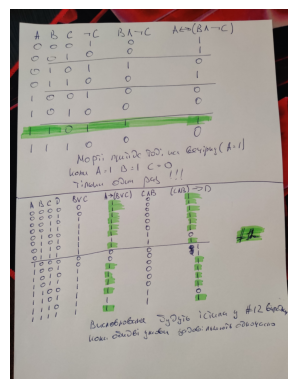

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Шлях до вашого зображення
image_path = '/content/dz_4_1.jpg'

img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.axis('off')  # Прибрати осі
plt.show()

## Завдання 2
Із 40 програмістів 18 володіють мовою Python, 19 — мовою С++, 21 — мовою Java. Відомо, що 10 програмістів знають одночасно Python і С++, 7 — Python і Java, 8 — C++ і Java. Троє програмістів не володіють жодною із мов Python, С++, Java. Знайти кількість програмістів, які одночасно знають усі три мови програмування.

In [9]:
# Вхідні дані
n = 40  # Загальна кількість програмістів
P = 18  # Програмісти, які знають Python
C = 19  # Програмісти, які знають C++
J = 21  # Програмісти, які знають Java
P_and_C = 10  # Програмісти, які знають Python і C++
P_and_J = 7   # Програмісти, які знають Python і Java
C_and_J = 8   # Програмісти, які знають C++ і Java
N = 3         # Програмісти, які не знають жодної з цих мов

# Кількість програмістів, які знають хоча б одну з мов
at_least_one = n - N

# Використання принципу включення-виключення для знаходження програмістів, які знають всі три мови
all_three = at_least_one - (P + C + J - P_and_C - P_and_J - C_and_J)

print(f"Кількість програмістів, які знають одночасно всі три мови програмування: {all_three}")


Кількість програмістів, які знають одночасно всі три мови програмування: 4


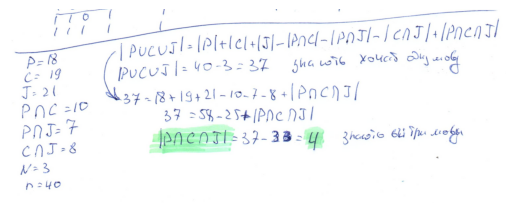

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Шлях до вашого зображення
image_path = '/content/dz_4_2.jpg'

img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.axis('off')  # Прибрати осі
plt.show()

# ЯКОСЬ так я це бачу